*All libraries used*

In [1]:
import requests
import time
import pandas as pd
import numpy as np
import seaborn as sns
import random
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

#sns.set(style='whitegrid', palette='muted')
sns.set(palette='muted')
%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_colwidth = 0

## 1 Data Import and Cleaning

In [2]:
#Reading 5 airline dataset
AirAsiaSupport_df = pd.read_csv("../dataset/AirAsiaSupport_df.csv")
AmericanAir_df = pd.read_csv("../dataset/AmericanAir_df.csv")
British_Airways_df = pd.read_csv("../dataset/British_Airways_df.csv")
Delta_df = pd.read_csv("../dataset/Delta_df.csv")
SouthwestAir_df = pd.read_csv("../dataset/SouthwestAir_df.csv")

In [3]:
def remove_duplicates(df):
    before_d = len(df)
    df.drop_duplicates(inplace=True)
    after_d = len(df)
    print(str(before_d-after_d) + " duplicates were removed!")
    print("Final Shape:" + str(df.shape))
    
def check_null(df):
    print("Shape:" + str(df.shape))
    before_d = len(df)
    nulls = df.isnull().sum().sum()
    after_d = len(df)
    if nulls != 0:
        len_null = df.dropna(inplace=True)
        after_d = len(df)
    print(str(before_d-after_d) + " NaNs rows were removed!")
        
def reset_index(df):
    df = df.reset_index(inplace=True)
            
def cleaning_df(df):
    check_null(df)
    remove_duplicates(df)
    #reset_index(df)

### 1.1 AirAsiaSupport

In [4]:
AirAsiaSupport_df.head()

,author_id_x,text_x,author_id_y,text_y
0,115799,@AirAsiaSupport CAS-19708536-CB92N2 CRM:0326600 Please check on this I haven't heard from my case officer in weeks and provided all docs.,AirAsiaSupport,@115799 We have replied to you via DM. Check it out =) Yana
1,115801,@115802 @AirAsiaSupport Why are you not refunding my trip to Bali for Volcano eruption!!! Urgently refund!!,AirAsiaSupport,"@115801 Hi Ashutosh , Could you provide us the booking number for further checking. Thanks - Khairul"
2,116049,@AirAsiaSupport what happen to your system. I could not sent my refund info to e form,AirAsiaSupport,"@116049 Hi Firdaus, we has respond you via DM,see you there! - Anwar"
3,116243,@AirAsiaSupport saya nak tukar flight sbb reschedule. booking #YIU8NM,AirAsiaSupport,"@116243 Hi Ijan :) Yes sure, we has respond you via DM, see you there!-Anwar"
4,116720,@AirAsiaSupport name correction my case number 494610,AirAsiaSupport,"@116720 Hi there, there is no payment transaction has been made on your booking number and it is expired. -Jimy"


In [5]:
cleaning_df(AirAsiaSupport_df)

Shape:(7058, 4)
0 NaNs rows were removed!
0 duplicates were removed!
Final Shape:(7058, 4)


In [6]:
#Dropped unwanted columns
AirAsiaSupport_df.drop(columns = 'author_id_x', inplace=True)
AirAsiaSupport_df.head()

,text_x,author_id_y,text_y
0,@AirAsiaSupport CAS-19708536-CB92N2 CRM:0326600 Please check on this I haven't heard from my case officer in weeks and provided all docs.,AirAsiaSupport,@115799 We have replied to you via DM. Check it out =) Yana
1,@115802 @AirAsiaSupport Why are you not refunding my trip to Bali for Volcano eruption!!! Urgently refund!!,AirAsiaSupport,"@115801 Hi Ashutosh , Could you provide us the booking number for further checking. Thanks - Khairul"
2,@AirAsiaSupport what happen to your system. I could not sent my refund info to e form,AirAsiaSupport,"@116049 Hi Firdaus, we has respond you via DM,see you there! - Anwar"
3,@AirAsiaSupport saya nak tukar flight sbb reschedule. booking #YIU8NM,AirAsiaSupport,"@116243 Hi Ijan :) Yes sure, we has respond you via DM, see you there!-Anwar"
4,@AirAsiaSupport name correction my case number 494610,AirAsiaSupport,"@116720 Hi there, there is no payment transaction has been made on your booking number and it is expired. -Jimy"


In [7]:
#Convert 'text_x' & 'text_y' columns to string. 
AirAsiaSupport_df['text_x'] = AirAsiaSupport_df['text_x'].astype(str)
AirAsiaSupport_df['text_y'] = AirAsiaSupport_df['text_y'].astype(str)

In [8]:
#Convert all string to lower case
AirAsiaSupport_df['text_x'] = AirAsiaSupport_df['text_x'].str.lower()
AirAsiaSupport_df['text_y'] = AirAsiaSupport_df['text_y'].str.lower()

### 1.2 American Air

In [9]:
AmericanAir_df.head()

,author_id_x,text_x,author_id_y,text_y
0,115905,Ben Tennyson and an American Airlines pilot. 🎃 #trunkortreat #halloween #2017 #diycostume #parenting @americanair … https://t.co/f1nNHQ0iLa https://t.co/lDViDkRdB1,AmericanAir,"@115905 Aww, that's definitely a future pilot in the making! #HappyHalloween"
1,115906,"I’m sorry, what? It’s going to COST me $50 to transfer 4,000 AA Advantage points to my spouse? @AmericanAir this is ridiculous!!",AmericanAir,@115906 This is a great option for customers who want to share miles and it's cheaper than having to purchase them.
2,115907,Heading to London tonight will be there for 5 days doing some exciting stuff:) @AmericanAir get the drinks ready I coming aboard:) JB,AmericanAir,"@115907 It's always a pleasure to have you on board, John. Have a wonderful flight over the pond!"
3,115908,Check out these tiny trick-or-treaters all dressed up in our #NICU. Hey @AmericanAir! We have your youngest #pilot in training! #Halloween https://t.co/0C3aXJhiAg,AmericanAir,"@115908 Pilots, Potter, Pumpkins and Skeletons...oh my! They're all adorable."
4,115909,"Thank you, @AmericanAir for playing #ThisIsUs and for having great flight attendants on my flight back home!",AmericanAir,@115909 We're glad you got to kick back and enjoy a show while flying! Thanks for your kind words.


In [10]:
cleaning_df(AmericanAir_df)

Shape:(24506, 4)
0 NaNs rows were removed!
0 duplicates were removed!
Final Shape:(24506, 4)


In [11]:
#Dropped unwanted columns
AmericanAir_df.drop(columns = 'author_id_x', inplace = True)
AmericanAir_df.head()

,text_x,author_id_y,text_y
0,Ben Tennyson and an American Airlines pilot. 🎃 #trunkortreat #halloween #2017 #diycostume #parenting @americanair … https://t.co/f1nNHQ0iLa https://t.co/lDViDkRdB1,AmericanAir,"@115905 Aww, that's definitely a future pilot in the making! #HappyHalloween"
1,"I’m sorry, what? It’s going to COST me $50 to transfer 4,000 AA Advantage points to my spouse? @AmericanAir this is ridiculous!!",AmericanAir,@115906 This is a great option for customers who want to share miles and it's cheaper than having to purchase them.
2,Heading to London tonight will be there for 5 days doing some exciting stuff:) @AmericanAir get the drinks ready I coming aboard:) JB,AmericanAir,"@115907 It's always a pleasure to have you on board, John. Have a wonderful flight over the pond!"
3,Check out these tiny trick-or-treaters all dressed up in our #NICU. Hey @AmericanAir! We have your youngest #pilot in training! #Halloween https://t.co/0C3aXJhiAg,AmericanAir,"@115908 Pilots, Potter, Pumpkins and Skeletons...oh my! They're all adorable."
4,"Thank you, @AmericanAir for playing #ThisIsUs and for having great flight attendants on my flight back home!",AmericanAir,@115909 We're glad you got to kick back and enjoy a show while flying! Thanks for your kind words.


In [12]:
#Convert 'text_x' & 'text_y' columns to string. 
AmericanAir_df['text_x'] = AmericanAir_df['text_x'].astype(str)
AmericanAir_df['text_y'] = AmericanAir_df['text_y'].astype(str)

In [13]:
#Convert all string to lower case
AmericanAir_df['text_x'] = AmericanAir_df['text_x'].str.lower()
AmericanAir_df['text_y'] = AmericanAir_df['text_y'].str.lower()

### 1.3 British Airways

In [14]:
British_Airways_df.head()

,author_id_x,text_x,author_id_y,text_y
0,115892,"Hi @British_Airways! My flight from MAN--LHR--BWI for Nov. 3 was canceled. I was excited to try your Club 787 product. Only available flight is now to IAD which is a hassle, but rebooked anyway--my only option! Any availability in first class on BA293 for the troubles please?",British_Airways,"@115892 caused. We're unable to offer a complimentary upgrade, however we can quote an upgrade if you would like us to? ^Jane 2/2"
1,115892,"Hi @British_Airways! My flight from MAN--LHR--BWI for Nov. 3 was canceled. I was excited to try your Club 787 product. Only available flight is now to IAD which is a hassle, but rebooked anyway--my only option! Any availability in first class on BA293 for the troubles please?",British_Airways,"@115892 We're so sorry to hear your flight was cancelled, Bryce. We're pleased you've been rebooked, however we're sorry for the hassle this has 1/2"
2,115893,"@British_Airways will you ever address my complaint/claim? Or, do you just ignore it until the 2 yrs are up?",British_Airways,@115893 email address and contact telephone number. We'll look into your complaint and contact you for an update 2/2. ^Oliver
3,115893,"@British_Airways will you ever address my complaint/claim? Or, do you just ignore it until the 2 yrs are up?",British_Airways,"@115893 We apologise for not responding sooner. We're now following you. Please follow us back and send your full name, booking reference, 1/2"
4,115895,@British_Airways can I just confirm the email that would send passport details to change a name on a ticket is __email__?,British_Airways,"@115895 Hi Sam, that is the correct email. ^Helen"


In [15]:
cleaning_df(British_Airways_df)

Shape:(19611, 4)
0 NaNs rows were removed!
0 duplicates were removed!
Final Shape:(19611, 4)


In [16]:
#Dropped unwanted columns
British_Airways_df.drop(columns = 'author_id_x', inplace = True)
British_Airways_df.head()

,text_x,author_id_y,text_y
0,"Hi @British_Airways! My flight from MAN--LHR--BWI for Nov. 3 was canceled. I was excited to try your Club 787 product. Only available flight is now to IAD which is a hassle, but rebooked anyway--my only option! Any availability in first class on BA293 for the troubles please?",British_Airways,"@115892 caused. We're unable to offer a complimentary upgrade, however we can quote an upgrade if you would like us to? ^Jane 2/2"
1,"Hi @British_Airways! My flight from MAN--LHR--BWI for Nov. 3 was canceled. I was excited to try your Club 787 product. Only available flight is now to IAD which is a hassle, but rebooked anyway--my only option! Any availability in first class on BA293 for the troubles please?",British_Airways,"@115892 We're so sorry to hear your flight was cancelled, Bryce. We're pleased you've been rebooked, however we're sorry for the hassle this has 1/2"
2,"@British_Airways will you ever address my complaint/claim? Or, do you just ignore it until the 2 yrs are up?",British_Airways,@115893 email address and contact telephone number. We'll look into your complaint and contact you for an update 2/2. ^Oliver
3,"@British_Airways will you ever address my complaint/claim? Or, do you just ignore it until the 2 yrs are up?",British_Airways,"@115893 We apologise for not responding sooner. We're now following you. Please follow us back and send your full name, booking reference, 1/2"
4,@British_Airways can I just confirm the email that would send passport details to change a name on a ticket is __email__?,British_Airways,"@115895 Hi Sam, that is the correct email. ^Helen"


In [17]:
#Convert 'text_x' & 'text_y' columns to string. 
British_Airways_df['text_x'] = British_Airways_df['text_x'].astype(str)
British_Airways_df['text_y'] = British_Airways_df['text_y'].astype(str)

In [18]:
#Convert all string to lower case
British_Airways_df['text_x'] = British_Airways_df['text_x'].str.lower()
British_Airways_df['text_y'] = British_Airways_df['text_y'].str.lower()

### 1.4 Delta

In [19]:
Delta_df.head()

,author_id_x,text_x,author_id_y,text_y
0,115818,@DELTA i booked my flight using delta amex card. Checking in now &amp; was being charged for baggage,Delta,"@115818 Glad to check. Pls, DM your confirmation number for assistance. *QB https://t.co/6iDGBJAc2m"
1,115882,"@Delta why wasn't earlier flight offered when I tried to rebook, not cool at all. Just happened to look at moniter after deplaning.",Delta,@115882 I'm sorry. The earlier flight may not have been available at the time of your scheduled change. *TMT
2,115883,"@Delta The ""change flight"" search option on your website is broken once again. 😑",Delta,"@115883 I sincerely apologize, our IT team is diligently working on it, we should have it up and working very soon. *TMC"
3,115884,.@delta this has been my inflight studio experience today. Nothing works except Twitter #toobadforyouandme https://t.co/VLo4ufL73y,Delta,"@115884 Oh, no! Please speak to a member of the flt crew for immediate assistance. *AAB"
4,115885,"@Delta I'm flying JFK-MEX-MID tomorrow and you say I'm booked in, but it looks like it's just the first leg. Can you check, please?",Delta,"@115885 Hi, Richard. Can you pls DM your confirmation number so I may look into this matter for you? Thanks! *TJF https://t.co/6iDGBJAc2m"


In [20]:
cleaning_df(Delta_df)

Shape:(28485, 4)
0 NaNs rows were removed!
0 duplicates were removed!
Final Shape:(28485, 4)


In [21]:
#Dropped unwanted columns
Delta_df.drop(columns = 'author_id_x', inplace = True)
Delta_df.head()

,text_x,author_id_y,text_y
0,@DELTA i booked my flight using delta amex card. Checking in now &amp; was being charged for baggage,Delta,"@115818 Glad to check. Pls, DM your confirmation number for assistance. *QB https://t.co/6iDGBJAc2m"
1,"@Delta why wasn't earlier flight offered when I tried to rebook, not cool at all. Just happened to look at moniter after deplaning.",Delta,@115882 I'm sorry. The earlier flight may not have been available at the time of your scheduled change. *TMT
2,"@Delta The ""change flight"" search option on your website is broken once again. 😑",Delta,"@115883 I sincerely apologize, our IT team is diligently working on it, we should have it up and working very soon. *TMC"
3,.@delta this has been my inflight studio experience today. Nothing works except Twitter #toobadforyouandme https://t.co/VLo4ufL73y,Delta,"@115884 Oh, no! Please speak to a member of the flt crew for immediate assistance. *AAB"
4,"@Delta I'm flying JFK-MEX-MID tomorrow and you say I'm booked in, but it looks like it's just the first leg. Can you check, please?",Delta,"@115885 Hi, Richard. Can you pls DM your confirmation number so I may look into this matter for you? Thanks! *TJF https://t.co/6iDGBJAc2m"


In [22]:
#Convert 'text_x' & 'text_y' columns to string. 
Delta_df['text_x'] = Delta_df['text_x'].astype(str)
Delta_df['text_y'] = Delta_df['text_y'].astype(str)

In [23]:
#Convert all string to lower case
Delta_df['text_x'] = Delta_df['text_x'].str.lower()
Delta_df['text_y'] = Delta_df['text_y'].str.lower()

### 1.5 SouthwestAir

In [24]:
SouthwestAir_df.head()

,author_id_x,text_x,author_id_y,text_y
0,115925,I really hadthe WORST experience ever from start to finish with @SouthwestAir will never fly internationally again with them,SouthwestAir,@115925 We're truly sorry to hear that. Please PM us more info so we can followup with you. ^VP
1,115926,Celebrated Halloween on a @southwestair flight with my pumpkin spice @15890 and a delicious (free) @115927 O… https://t.co/GGPGaaFVq2 https://t.co/gnCxPEsaEv,SouthwestAir,"@115926 Happy HalloWN! Bottoms up, Risa! ^SL"
2,115928,Thanks to the wonderful @SouthwestAir crews of flights 1732 &amp; 560 for getting us from Sacramento to KC safe and sound! #YouRock,SouthwestAir,"@115928 We aim to please, Eric! Your love means the world to us, and we can't wait to share the skies with you again soon! ^MK"
3,115929,@SouthwestAir is down on the my account page 😑😑,SouthwestAir,"@115929 Hm, we haven't had any reported errors lately. Have you tried accessing your RR account via a different browser? ^MA"
4,115932,Best part of my Halloween? Free drinks on all my @SouthwestAir flights for the holiday👻It’s spooktacular.,SouthwestAir,"@115932 We love to give out free boos so much, we're basically ghosts! Happy HalloWN and bottoms up! ^SL"


In [25]:
cleaning_df(SouthwestAir_df)

Shape:(20986, 4)
0 NaNs rows were removed!
0 duplicates were removed!
Final Shape:(20986, 4)


In [26]:
#Dropped unwanted columns
SouthwestAir_df.drop(columns = 'author_id_x', inplace = True)
SouthwestAir_df.head()

,text_x,author_id_y,text_y
0,I really hadthe WORST experience ever from start to finish with @SouthwestAir will never fly internationally again with them,SouthwestAir,@115925 We're truly sorry to hear that. Please PM us more info so we can followup with you. ^VP
1,Celebrated Halloween on a @southwestair flight with my pumpkin spice @15890 and a delicious (free) @115927 O… https://t.co/GGPGaaFVq2 https://t.co/gnCxPEsaEv,SouthwestAir,"@115926 Happy HalloWN! Bottoms up, Risa! ^SL"
2,Thanks to the wonderful @SouthwestAir crews of flights 1732 &amp; 560 for getting us from Sacramento to KC safe and sound! #YouRock,SouthwestAir,"@115928 We aim to please, Eric! Your love means the world to us, and we can't wait to share the skies with you again soon! ^MK"
3,@SouthwestAir is down on the my account page 😑😑,SouthwestAir,"@115929 Hm, we haven't had any reported errors lately. Have you tried accessing your RR account via a different browser? ^MA"
4,Best part of my Halloween? Free drinks on all my @SouthwestAir flights for the holiday👻It’s spooktacular.,SouthwestAir,"@115932 We love to give out free boos so much, we're basically ghosts! Happy HalloWN and bottoms up! ^SL"


In [27]:
#Convert 'text_x' & 'text_y' columns to string. 
SouthwestAir_df['text_x'] = SouthwestAir_df['text_x'].astype(str)
SouthwestAir_df['text_y'] = SouthwestAir_df['text_y'].astype(str)

In [28]:
#Convert all string to lower case
SouthwestAir_df['text_x'] = SouthwestAir_df['text_x'].str.lower()
SouthwestAir_df['text_y'] = SouthwestAir_df['text_y'].str.lower()

In [29]:
#Concat. 5 dataframe into 1
combine_df = pd.concat([AirAsiaSupport_df,AmericanAir_df,British_Airways_df,Delta_df,SouthwestAir_df],axis=0)

In [30]:
combine_df['text_x+y'] = combine_df['text_x'] + combine_df['text_y']

In [31]:
combine_df.shape

(100646, 4)

In [32]:
#Rename columns
combine_df.rename(columns={'author_id_y': 'label'},inplace = True)

In [33]:
combine_df.head(5)

,text_x,label,text_y,text_x+y
0,@airasiasupport cas-19708536-cb92n2 crm:0326600 please check on this i haven't heard from my case officer in weeks and provided all docs.,AirAsiaSupport,@115799 we have replied to you via dm. check it out =) yana,@airasiasupport cas-19708536-cb92n2 crm:0326600 please check on this i haven't heard from my case officer in weeks and provided all docs.@115799 we have replied to you via dm. check it out =) yana
1,@115802 @airasiasupport why are you not refunding my trip to bali for volcano eruption!!! urgently refund!!,AirAsiaSupport,"@115801 hi ashutosh , could you provide us the booking number for further checking. thanks - khairul","@115802 @airasiasupport why are you not refunding my trip to bali for volcano eruption!!! urgently refund!!@115801 hi ashutosh , could you provide us the booking number for further checking. thanks - khairul"
2,@airasiasupport what happen to your system. i could not sent my refund info to e form,AirAsiaSupport,"@116049 hi firdaus, we has respond you via dm,see you there! - anwar","@airasiasupport what happen to your system. i could not sent my refund info to e form@116049 hi firdaus, we has respond you via dm,see you there! - anwar"
3,@airasiasupport saya nak tukar flight sbb reschedule. booking #yiu8nm,AirAsiaSupport,"@116243 hi ijan :) yes sure, we has respond you via dm, see you there!-anwar","@airasiasupport saya nak tukar flight sbb reschedule. booking #yiu8nm@116243 hi ijan :) yes sure, we has respond you via dm, see you there!-anwar"
4,@airasiasupport name correction my case number 494610,AirAsiaSupport,"@116720 hi there, there is no payment transaction has been made on your booking number and it is expired. -jimy","@airasiasupport name correction my case number 494610@116720 hi there, there is no payment transaction has been made on your booking number and it is expired. -jimy"


In [34]:
#Map 0-4 accordingly
combine_df['label'] = combine_df['label'].map({'AirAsiaSupport':0,'AmericanAir':1,'British_Airways':2,'Delta':3,'SouthwestAir':4})

In [35]:
from sklearn.utils import shuffle
combine_df = shuffle(combine_df)

In [36]:
combine_df = combine_df.reset_index(drop=True)

In [ ]:
combine_df.head(20)

In [ ]:
combine_df.iloc[[41335,]]

In [ ]:
combine_df.iloc[[87703,]]

In [ ]:
combine_df.iloc[[84203,]]

In [ ]:
combine_df.iloc[[13935,]]

In [37]:
#Saving combine_df.csv
combine_df.to_csv("../dataset/combine_airlines.csv")

## 2 Model preparation

### 2.1 Train/Test Split

Splitting the data into train and test set before doing the processing

In [38]:
# Import train_test_split.
from sklearn.model_selection import train_test_split

# Create train_test_split.
X_train, X_test, y_train, y_test = train_test_split(combine_df[['text_x+y']],
                                                    combine_df['label'],
                                                    test_size = 0.25,
                                                    random_state = 42,
                                                    shuffle = True, 
                                                    stratify=combine_df['label'])

In [39]:
X_test.head()

,text_x+y
10447,@southwestair at lax the friendliest most customer service savvy peeps i have seen at airport ticketing #wishtheycouldtrainonboardpersonnel@178260 thanks for the shoutout! we appreciate your feedback and hope you enjoy the flight! ^jb
19647,"@delta i love you https://t.co/mlsxcsnwjm@301907 aww, we're feeling the love! thanks for the shout-out, traci.😊 *ajc"
70180,@americanair i just got a confirmation to upgrade 🤷🏻‍♂️ but i didn't request. can someone confirm :o?@434655 we've sent you a dm with more info.
66075,"arrive early at 1248 still on runway waiting for gate at 114 even though i see empty gates. gotta love the @southwestair special treatment.@359969 sorry for the wait today, dave. we'll get you to a gate asap. ^vm"
35444,"it's getting hot in here 😩 no ac yet on plane! @southwestair, can you help a sister out with a drink ticket? https://t.co/gvj0caqqcx@397861 apologies for any discomfort onboard, rocio. please reach out to one of our flight attendants for assistance! ^mk"


In [40]:
X_train.head()

,text_x+y
37152,"very upset w @delta. mech issues from sea&gt;dtw = 1hr delay. was told we missed connect&gt;bwi, we arrived 30 mins before they left. had to stay in detroit and instead of staying w many others at the nice @162772 attached to dtw, myself and other 💎were sent to cheap airport wyndham@697991 i am sorry to hear about the tough time you've had. please give me a minute as i review your trip details. *hpl"
90067,i hate @southwestair sooo much. never again.@491495 very sorry to hear that. feel free to send a dm if you would like to discuss anything further. ^sl https://t.co/mqmfkxw4ov
45061,"no credit note/refund from @british_airways on cancelled flight; &amp; rude advisor said ""do a no show""-- meaning empty seat &amp; waste of carbon@129656 contact number. please send this via dm. many thanks. ^lisa 2/2"
97385,"@americanair \nlate afternoon at the dfw admirals club - terminal d. \nwhat an spectacular view 😀 https://t.co/23ptgxuphz@121781 that's an amazing, #aamericanview, we're glad you could catch the gorgeous texas sunset from the club!"
73650,thank you @delta 🙋🏽you know it! https://t.co/le6jnzhj2c@647971 love the pink passport. *als


In [41]:
y_test.head()

10447    4
19647    3
70180    1
66075    4
35444    4
Name: label, dtype: int64

In [42]:
y_train.head()

37152    3
90067    4
45061    2
97385    1
73650    3
Name: label, dtype: int64

### 2.2 Pre-Processing

In [43]:
#Import Tokenizer
from nltk.tokenize import RegexpTokenizer
#Removing HTML code artifacts
from bs4 import BeautifulSoup  
# Import stopwords list
from nltk.corpus import stopwords
#Import Lemmatizer
from nltk.stem import WordNetLemmatizer
#Import Regular Expression
import regex as re

Include the 5 airlines names into the stopwords.

In [44]:
stopwords = stopwords.words('english')
newStopWords = ['southwestair','delta','airasiasupport','americanair','british','airways']
stopwords.extend(newStopWords)

In [45]:
#Checking to see stopwords being added.
stops = set(stopwords)
stops

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'airasiasupport',
 'airways',
 'all',
 'am',
 'americanair',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'british',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'delta',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',


In [107]:
def selftext_to_words(raw_selftext):
    # Function to convert raw selftext to a string of words
    # Input is a single string (a raw selftext), and 
    # output is a single string (a preprocessed selftext)
    
    # 1. Remove HTML.
    combine_selftext_BS = BeautifulSoup(raw_selftext)
    combine_selftext = combine_selftext_BS.get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", combine_selftext)
    
    # 3.Tokenizing
    tokenizer = RegexpTokenizer('[a-zA-z]\w+')
    combine_tokens = tokenizer.tokenize(letters_only)
        
    # 4. Remove stop words.
    remove_stop_words = [w for w in combine_tokens if not w in stops]
    
    # 5. Lemmatizing
    lemmatizer = WordNetLemmatizer()
    meaningful_words = [lemmatizer.lemmatize(i) for i in remove_stop_words]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [47]:
# Get the number of reviews based on the dataframe size.
total_selftext = combine_df.shape[0]
print(f'There are {total_selftext} text.')

# Initialize an empty list to hold the clean text.
clean_train = []
clean_test = []

There are 100646 text.


In [48]:
print("Cleaning and parsing the training set ...")

j = 0
for train_selftext in X_train['text_x+y']:
    # Convert review to words, then append to clean_train_reviews.
    clean_train.append(selftext_to_words(train_selftext))
    
    # If the index is divisible by 1000, print a message
    if (j + 1) % 10000 == 0:
        print(f'Review {j + 1} of {total_selftext}.')
    
    j += 1

print("Cleaning and parsing the testing set ...")    
for test_selftext in X_test['text_x+y']:
    # Convert review to words, then append to clean_train_reviews.
    clean_test.append(selftext_to_words(test_selftext))
    
    # If the index is divisible by 1000, print a message
    if (j + 1) % 10000 == 0:
        print(f'Review {j + 1} of {total_selftext}.')
    
    j += 1
    
print("Cleaning done ...")

Cleaning and parsing the training set ...
Review 10000 of 100646.
Review 20000 of 100646.
Review 30000 of 100646.
Review 40000 of 100646.
Review 50000 of 100646.
Review 60000 of 100646.
Review 70000 of 100646.
Cleaning and parsing the testing set ...
Review 80000 of 100646.
Review 90000 of 100646.
Review 100000 of 100646.
Cleaning done ...


## 3 Exploratory Data Analysis

In [49]:
from wordcloud import WordCloud
#stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stops,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title,fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

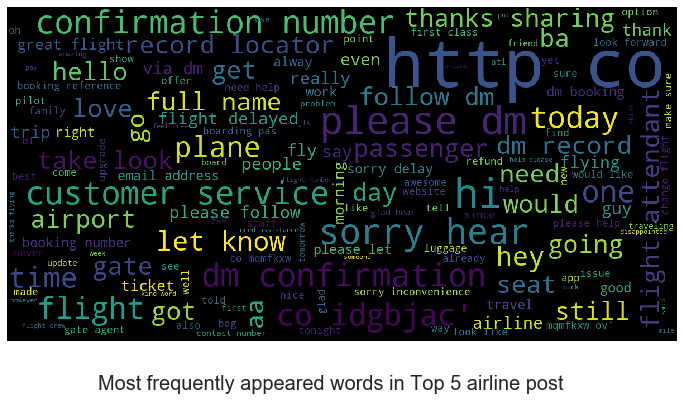

In [50]:
#Showing most frequent appear words in wordcloud.
show_wordcloud(clean_train, title = "Most frequently appeared words in Top 5 airline post")

As can be seen, words like "confirmation", "please", "flight" appear quite frequently which is not a surprise. Generally, questions like flight confirmation, complains are common topics in the airline industry.

In [51]:
clean_train

['upset mech issue sea dtw hr delay told missed connect bwi arrived min left stay detroit instead staying many others nice attached dtw sent cheap airport wyndham sorry hear tough time please give minute review trip detail hpl',
 'hate sooo much never sorry hear feel free send dm would like discus anything sl http co mqmfkxw ov',
 'credit note refund cancelled flight rude advisor said show meaning empty seat waste carbon contact number please send via dm many thanks lisa',
 'late afternoon dfw admiral club terminal spectacular view http co ptgxuphz amazing aamericanview glad could catch gorgeous texas sunset club',
 'thank know http co le jnzhj love pink passport al',
 'looking phone number help ba cadet programme hi kev please website address http co wz bxyqnn information',
 'tour home henderson aa flight issue landing gear back home http co vkuoznu appreciate patience get safely back way fast',
 'thank upgrade go california casuperfam welcome claire amazing trip lisa',
 'taken away a

### 3.1 Num. of post per Airline

In [52]:
count = combine_df['label'].value_counts()

In [53]:
count.rename(index={0:'AirAsiaSupport', 1:'AmericanAir', 2:'British_Airways', 3:'Delta', 4:'SouthwestAir' }, inplace = True)

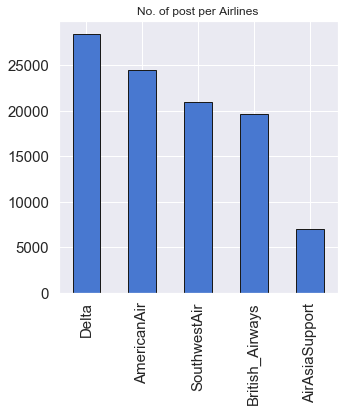

In [54]:
count.plot(kind = 'bar', figsize=(5, 5), fontsize=15,edgecolor='k', title = 'No. of post per Airlines')

As can be seen, the number of post from the Air Asia Support is the lowest. Is only about 10% of the total post. But the number of post from Air Asia Support has more than 5000. No oversampling will be done unless the model give a very bad results.

### 3.2 CountVectorizer

In [55]:
# NLP Using a count vectorizer for EDA purpose.
from sklearn.feature_extraction.text import CountVectorizer

In [56]:
# Setting the vectorizer
cv = CountVectorizer()

# Fitting the vectorizer on clean data
cv.fit(clean_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [57]:
# Check the length of clean data that is in a vectorized state
len(cv.get_feature_names())

60734

In [58]:
# Transforming vertorize clean data and converting the result to a DataFrame.
cv_df = pd.DataFrame(cv.transform(clean_train).todense(),
                       columns=cv.get_feature_names())

In [59]:
cv_df.shape

(75484, 60734)

In [60]:
# Which words appear the most no. of time?
word_counts = cv_df.sum(axis=0)
print(len(word_counts))
word_counts.sort_values(ascending = False).head(20)

60734


flight     40689
co         24996
http       24897
please     18785
hi         17381
thanks     17288
sorry      14169
dm         13839
get        10987
help       10462
number     9853 
time       9782 
check      8682 
hear       7373 
need       7304 
service    7286 
seat       7193 
booking    7133 
great      7082 
thank      7017 
dtype: int64

In [61]:
top_cv_df =pd.DataFrame({'word':cv_df.columns,
                         'word_count':cv_df.sum()})
top_cv_df = top_cv_df.sort_values('word_count',ascending = False).head(20)

Text(0, 0.5, 'Count')

<Figure size 1080x576 with 0 Axes>

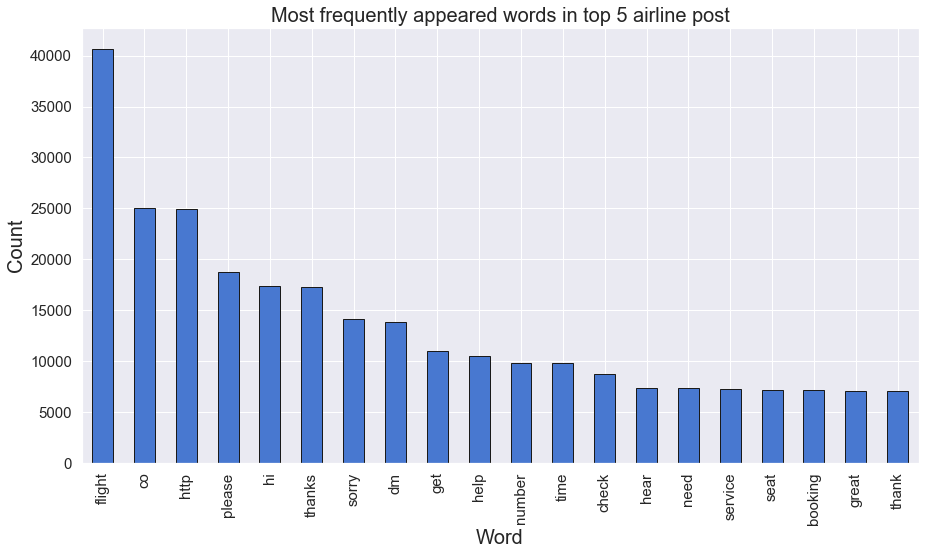

In [62]:
#To view the actual word counts using count vectorizer.
fig = plt.figure(figsize=(15,8))
top_cv_df.plot(kind = 'bar',figsize=(15, 8), fontsize=15, legend=False, edgecolor='k')
plt.tick_params(axis='both', width=15)
plt.title("Most frequently appeared words in top 5 airline post", fontsize = 20)
plt.xlabel("Word", fontsize = 20)
plt.ylabel("Count", fontsize = 20)

Since the dataset is about airline, the word "flight" naturally should have the highest word counts. Both the word "co" and "https" almost has the same number of word counts which does make sense. Some posts will include a twitter link. Example: "https://t.co/lqgo0tvvgv" .

In [63]:
#Convert to dataframe for common words in 'AirAsiaSupport' post
top_AirAsiaSupport_df = pd.DataFrame({'word':cv_df[(np.array(y_train))==0],
                         'word_count':cv_df[(np.array(y_train))==0].sum(axis=0)})
top_AirAsiaSupport_df = top_AirAsiaSupport_df.sort_values('word_count',ascending = False).head(15)

In [64]:
#Convert to dataframe for common words in 'AmericanAir' post
top_AmericanAir_df = pd.DataFrame({'word':cv_df[(np.array(y_train))==1],
                         'word_count':cv_df[(np.array(y_train))==1].sum(axis=0)})
top_AmericanAir_df = top_AmericanAir_df.sort_values('word_count',ascending = False).head(15)

In [65]:
#Convert to dataframe for common words in 'British_Airways' post
top_British_Airways_df = pd.DataFrame({'word':cv_df[(np.array(y_train))==2],
                         'word_count':cv_df[(np.array(y_train))==2].sum(axis=0)})
top_British_Airways_df = top_British_Airways_df.sort_values('word_count',ascending = False).head(15)

In [66]:
#Convert to dataframe for common words in 'Delta' post
top_Delta_df =pd.DataFrame({'word':cv_df[(np.array(y_train))==3],
                         'word_count':cv_df[(np.array(y_train))==3].sum(axis=0)})
top_Delta_df = top_Delta_df.sort_values('word_count',ascending = False).head(15)

In [67]:
#Convert to dataframe for common words in 'SouthwestAir' post
top_SouthwestAir_df = pd.DataFrame({'word':cv_df[(np.array(y_train))==4],
                         'word_count':cv_df[(np.array(y_train))==4].sum(axis=0)})
top_SouthwestAir_df = top_SouthwestAir_df.sort_values('word_count',ascending = False).head(15)

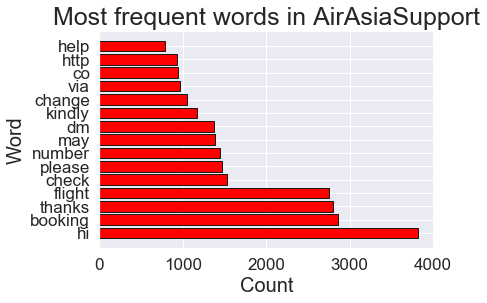

In [75]:
#fig = plt.figure(figsize=(25,13))

#ax= fig.add_subplot(3,3,1)
plt.barh(top_AirAsiaSupport_df.index,top_AirAsiaSupport_df['word_count'], color='red', edgecolor='k');
plt.title("Most frequent words in AirAsiaSupport", fontsize = 25)
plt.xlabel("Count", fontsize = 20)
plt.ylabel("Word", fontsize = 20)
plt.tick_params(axis='both', labelsize = 17)

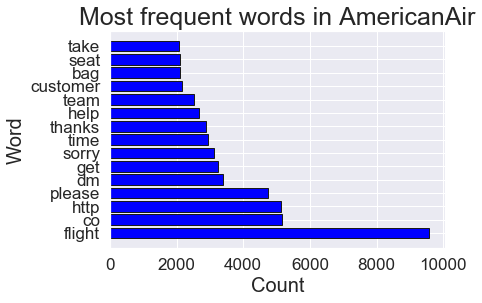

In [76]:
#ax= fig.add_subplot(3,3,2)
plt.barh(top_AmericanAir_df.index,top_AmericanAir_df['word_count'], color='blue',edgecolor='k' );
plt.title("Most frequent words in AmericanAir", fontsize = 25)
plt.xlabel("Count", fontsize = 20)
plt.ylabel("Word", fontsize = 20)
plt.tick_params(axis='both', labelsize = 17)

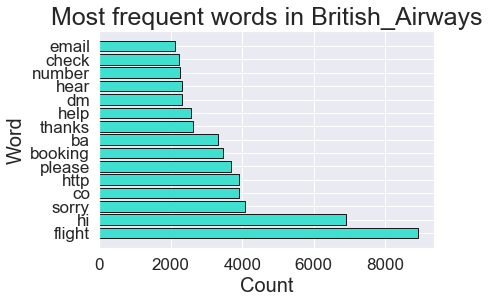

In [77]:
#ax= fig.add_subplot(3,3,3)
plt.barh(top_British_Airways_df.index,top_British_Airways_df['word_count'], color='turquoise',edgecolor='k' );
plt.title("Most frequent words in British_Airways", fontsize = 25)
plt.xlabel("Count", fontsize = 20)
plt.ylabel("Word", fontsize = 20)
plt.tick_params(axis='both', labelsize = 17)

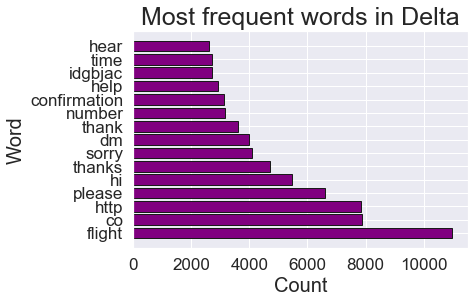

In [78]:
#ax= fig.add_subplot(3,3,4)
plt.barh(top_Delta_df.index,top_Delta_df['word_count'], color='purple',edgecolor='k' );
plt.title("Most frequent words in Delta", fontsize = 25)
plt.xlabel("Count", fontsize = 20)
plt.ylabel("Word", fontsize = 20)
plt.tick_params(axis='both', labelsize = 17)

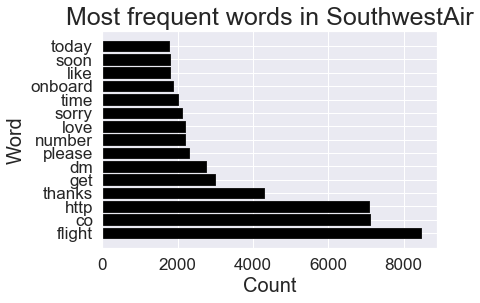

In [79]:
#ax= fig.add_subplot(3,3,5)
plt.barh(top_SouthwestAir_df.index,top_SouthwestAir_df['word_count'], color='black',edgecolor='k' );
plt.title("Most frequent words in SouthwestAir", fontsize = 25)
plt.xlabel("Count", fontsize = 20)
plt.ylabel("Word", fontsize = 20)
plt.tick_params(axis='both', labelsize = 17)

## 4 Model

### 4.1 Model 1 : Baseline Model(Naive Bayes)

#### 4.1.1 a) Pipeline

In [80]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipe_nb = Pipeline([('cvec', CountVectorizer()),
                  ('nb', MultinomialNB())
])

#### 4.1.2 b) Hyperparameters Tuning

In [81]:
from sklearn.model_selection import GridSearchCV
#For CountVectorizer:
pipe_params_cv = {
    'cvec__max_features': [4000, 5000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)]
}

In [82]:
start_time = time.time()
gs_nb = GridSearchCV(pipe_nb, param_grid=pipe_params_cv, cv=5)
model1 = gs_nb.fit(clean_train, y_train)
print("Best: %f using %s" % (model1.best_score_, model1.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.909769 using {'cvec__max_df': 0.9, 'cvec__max_features': 5000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 1)}
Execution time: 499.2345607280731 ms


In [83]:
model1.score(clean_train, y_train)

0.9215860314768692

The advantage of using Naive Bayes is it works well with large dataset and has low computation time. It can also be used for both binary and multiclass classification.

The disadvantage is it will only performs better when compared to other models like Logistic Regression on the condition that features are independent. However, it is not very likely to have a set of features that are totally independent.

Looking at the score of 0.922 is a pretty good result. Therefore, this will be my baseline model for the 5 airlines classifications.

#### 4.1.3 c) Confusion Matrix / Classification Report

In [84]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

from sklearn.utils.multiclass import unique_labels
from sklearn.multiclass import OneVsRestClassifier

from scipy import interp

In [85]:
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Purples):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]

    fig, ax = plt.subplots(figsize=(6,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)


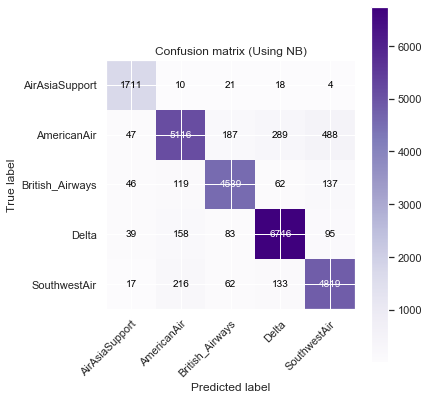

In [86]:
# Plot non-normalized confusion matrix
class_names = np.array(['AirAsiaSupport','AmericanAir','British_Airways','Delta','SouthwestAir'])
y_pred1 = model1.predict(clean_test)

plot_confusion_matrix(y_test, y_pred1, classes=class_names, title='Confusion matrix (Using NB)')

plt.show()

In [87]:
print('Accuracy {}'.format(accuracy_score(y_test, y_pred1)))
print(classification_report(y_test, y_pred1))

Accuracy 0.9113345521023766
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1764
           1       0.91      0.83      0.87      6127
           2       0.93      0.93      0.93      4903
           3       0.93      0.95      0.94      7121
           4       0.87      0.92      0.89      5247

    accuracy                           0.91     25162
   macro avg       0.91      0.92      0.91     25162
weighted avg       0.91      0.91      0.91     25162



Looking at the confusion matirx, it still has a accuracy score of 91.1% using the test data. Still not very far off from the result using the training data which is 92.2%.

###  4.2 Model 2 : Logistic Regression

#### 4.2.1 a) Pipeline

In [88]:
from sklearn.linear_model import LogisticRegression
pipe_lr = Pipeline([('cvec', CountVectorizer()),
                  ('lr', LogisticRegression())
])

#### 4.2.2 b) Hyperparameters Tuning

In [89]:
pipe_params_lr = {
    'cvec__max_features': [4000,5000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)],
   # 'lr_max_iter': [100,110,120],
   # 'lr__C' : [1.0,1.5,2.0]
}

In [90]:
start_time = time.time()
gs = GridSearchCV(pipe_lr, param_grid=pipe_params_lr, cv=5)
model2 = gs.fit(clean_train, y_train)

print("Best: %f using %s" % (model2.best_score_, model2.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.961939 using {'cvec__max_df': 0.9, 'cvec__max_features': 5000, 'cvec__min_df': 3, 'cvec__ngram_range': (1, 2)}
Execution time: 1478.4717280864716 ms


In [91]:
model2.score(clean_train, y_train)

0.9844337872926713

The advantage of using logistic regression is it's easy implementation and efficiency. Scaling of features are not equired.
It does't really required high computation power. But since this dataset is pretty large, it does take more time than Naive Bayes but it should not take as much time as using others such as Support Vector Classifier or Random Forest.

The disadvantage is it cannot perform prediction of continuous outcomes but this is not really a concern in this multiclass classification problem. However, logistic regression is vulnerable to overfitting.

#### 4.2.3 c) Confusion Matrix / Classification Report

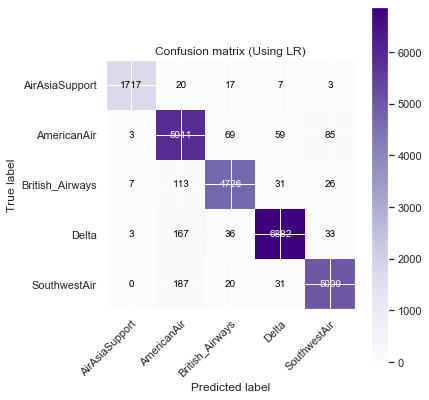

In [92]:
# Plot non-normalized confusion matrix
y_pred2 = model2.predict(clean_test)

plot_confusion_matrix(y_test, y_pred2, classes=class_names, title='Confusion matrix (Using LR)')

plt.show()

In [93]:
print('Accuracy {}'.format(accuracy_score(y_test, y_pred2)))
print(classification_report(y_test, y_pred2))

Accuracy 0.9635561561084175
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1764
           1       0.92      0.96      0.94      6127
           2       0.97      0.96      0.97      4903
           3       0.98      0.97      0.97      7121
           4       0.97      0.95      0.96      5247

    accuracy                           0.96     25162
   macro avg       0.97      0.96      0.97     25162
weighted avg       0.96      0.96      0.96     25162



Accuracy score of 96.4%

As can be seen from the result, it has a higher accuracy score than using the Naive Bayes model.

###  4.3 Model 3 : Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

#### 4.3.1 a) Pipeline

In [95]:
pipe_rf = Pipeline([('cvec', CountVectorizer()),
                  ('rf', RandomForestClassifier())
])

#### 4.3.2 b) Hyperparameters Tuning

In [96]:
cvec_rf_params = {
    'cvec__max_features': [5000],
    'cvec__min_df': [2, 3],
    'cvec__max_df': [.9, .95],
    'cvec__ngram_range': [(1,1), (1,2)],
    'rf__n_estimators': [200],
    #'rf__max_depth': [None, 1, 2, 3],
}
gs_rf = GridSearchCV(pipe_rf , param_grid=cvec_rf_params, cv=5)
model3= gs_rf.fit(clean_train, y_train)
print("Best: %f using %s" % (model3.best_score_, model3.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.921136 using {'cvec__max_df': 0.9, 'cvec__max_features': 5000, 'cvec__min_df': 2, 'cvec__ngram_range': (1, 2), 'rf__n_estimators': 200}
Execution time: 21618.644270420074 ms


In [97]:
model3.score(clean_train, y_train)

1.0

The advantage of using Random Forest is it high accuracy and robustness.

The disadvantage is computation time is relative high because of the multiple decision trees making decision for the same input and to perform voting. The airline dataset is pretty large, therefore, it takes the longest computation time as compared to the other two models.

It has the highest score as compared to the previous two models. It is overfitted.

#### 4.3.3 c) Confusion Matrix / Classification Report

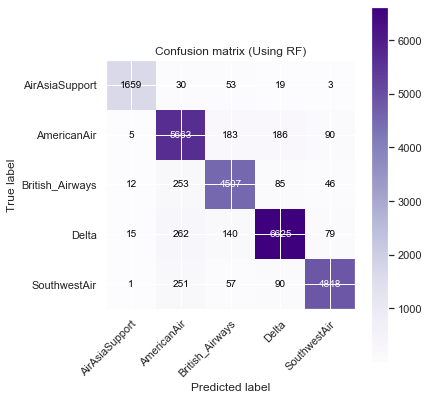

In [98]:
# Plot non-normalized confusion matrix
y_pred3 = model3.predict(clean_test)

plot_confusion_matrix(y_test, y_pred3, classes=class_names, title='Confusion matrix (Using RF)')

plt.show()

In [99]:
print('Accuracy {}'.format(accuracy_score(y_test, y_pred3)))
print(classification_report(y_test, y_pred3))

Accuracy 0.9260790080279787
              precision    recall  f1-score   support

           0       0.98      0.94      0.96      1764
           1       0.88      0.92      0.90      6127
           2       0.91      0.92      0.92      4903
           3       0.95      0.93      0.94      7121
           4       0.96      0.92      0.94      5247

    accuracy                           0.93     25162
   macro avg       0.93      0.93      0.93     25162
weighted avg       0.93      0.93      0.93     25162



Accuracy score of 92.6%

The Accuracy score is lower than the Logistic Regression but slightly higher than the Naive Bayes.

## 5 Conclusion

### 5.1 Model Serialization

Among the 3 models, Logestic Regression gives the best result. Therfore, it will be used as a production model. Will be using joblib to save my model from this notebook.

In [100]:
# Using best_params_ for countvectorizer
lr_cvec = CountVectorizer(max_df = 0.9, max_features = 5000, min_df = 2, ngram_range = (1, 2))

# Fitting the vectorizer on clean data
clean_train_cvec = lr_cvec.fit_transform(clean_train)
clean_test_cvec = lr_cvec.transform(clean_test)

In [101]:
lr_model2 = LogisticRegression()

my_model = lr_model2.fit(clean_train_cvec, y_train)

In [102]:
import joblib

joblib.dump(my_model, 'my_model_lr.pkl')
joblib.dump(lr_cvec, 'my_cvec.pkl')

['my_cvec.pkl']

With a single interface, we will be able to classify the different posts from different airline using Logistic regression model.